<a href="https://colab.research.google.com/github/Zzang-yeah/programmers_kdt_II/blob/week3/5_Day5_mission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mission 1. Netfilx and Code


호주니는 요즘 넷플릭스를 보는데 심취해있다. 최근 넷플릭스와 협업하는 K-Contents가 늘어가는 것을 보면서 자부심을 느끼는 한편, 넷플릭스에 얼마나 많은 한국 작품이 있는지 궁금해졌다. 호주니를 도와 넷플릭스에 얼마나 많은 한국 작품이 있는지 알아보자.  


---


###Mandatory Part
넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:

* 한국 작품은 총 얼마나 있는가?    

> * country column을 기준으로 한다.
> * "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)    

생각보다 많은 작품이 있었음에 놀란 호주니는 K-콘텐츠를 넘어 글로벌 콘텐츠에 관심을 가지게 되었다. 이 과정에서 가장 많은 콘텐츠가 있는 국가는 어디일지 궁금해졌다. 호주니를 도와 이번에는 넷플릭스에서 가장 많은 작품을 만든 나라가 어디이고, 얼마나 많은 작품을 produce했는지 알아보자.


---


###Bonus Part
넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:

* 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?     

> * country column을 기준으로 한다.
> * 단일 국가인 경우를 기준으로 결과를 구해보자.


###Mandatory Part

In [3]:
#준비
import numpy as np
import pandas as pd

netflix=pd.read_csv("./netflix_titles.csv")
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [6]:
#Mandatory Part
netflix_korea=netflix[netflix['country']=='South Korea']
len(netflix_korea)

183

###Bonus Part

In [43]:
#Bonus Part

#1. 결측치 확인
print('정보')
netflix.info()

print('\n결측치 갯수')
netflix.isnull().sum()

정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB

결측치 갯수


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [44]:
#2.결측치 드랍
netflix_max=netflix.dropna(subset=['country'])
netflix_max.isnull().sum()
netflix_max.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7280 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7280 non-null   object
 1   type          7280 non-null   object
 2   title         7280 non-null   object
 3   director      5193 non-null   object
 4   cast          6658 non-null   object
 5   country       7280 non-null   object
 6   date_added    7271 non-null   object
 7   release_year  7280 non-null   int64 
 8   rating        7274 non-null   object
 9   duration      7280 non-null   object
 10  listed_in     7280 non-null   object
 11  description   7280 non-null   object
dtypes: int64(1), object(11)
memory usage: 739.4+ KB


In [45]:
#3. 단일 국가인 경우만 남기기
netflix_drop=netflix_max[netflix_max['country'].str.contains(',')].index
netflix_max=netflix_max.drop(netflix_drop)

netflix_max.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6127 entries, 0 to 7785
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6127 non-null   object
 1   type          6127 non-null   object
 2   title         6127 non-null   object
 3   director      4261 non-null   object
 4   cast          5603 non-null   object
 5   country       6127 non-null   object
 6   date_added    6118 non-null   object
 7   release_year  6127 non-null   int64 
 8   rating        6121 non-null   object
 9   duration      6127 non-null   object
 10  listed_in     6127 non-null   object
 11  description   6127 non-null   object
dtypes: int64(1), object(11)
memory usage: 622.3+ KB


In [46]:
#4. 국가별 group by하기
netflix_max=netflix_max.groupby(by=netflix_max['country']).count()

In [47]:
netflix_max.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
country,,,,,,,,,,,
Argentina,50,50,50,36,46,50,50,50,50,50,50
Australia,83,83,83,38,74,82,83,82,83,83,83
Austria,4,4,4,4,3,4,4,4,4,4,4
Bangladesh,2,2,2,2,2,2,2,2,2,2,2
Belarus,1,1,1,0,1,1,1,1,1,1,1


In [56]:
#5.출력
max_country=netflix_max['title'].idxmax()
print('가장 많은 작품이 올라간 국가 : '+max_country)
print('작품의 갯수 : '+ str(netflix_max.loc[max_country,'title']))

가장 많은 작품이 올라간 국가 : United States
작품의 갯수 : 2555


##Mission 2. 가즈아!
서울의 소시민 나일론 마스크는 요즘 가상화폐에 푹 빠져있다. 매일매일 극락과 지옥을 오가는 매운맛에 정신을 못 차리고 있는데, 그의 친구인 호주니는 그에게 정신차리게 하기 위해 비트코인 광풍이 일었던 2017년 한 해의 가격의 변화를 보여주려고 한다. 그런데 매일매일의 데이터를 보여주는 것보다 이것의 추세를 표현해주면 좋겠다는 생각이 들어 Moving Average(이동평균법) 를 도입하고자 한다. 호주니를 도와 마스크씨를 설득해보자.

---

###Mandatory Part
다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.

* 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
* x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
* 이동평균의 기준은 Open Column으로 계산합니다.
* 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.    

💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.    

해당 그래프를 본 나일론 마스크씨는 정신을 차렸다. 정확히는 비트코인만 바라본 본인을 말이다. 정말 많은 가상화폐가 있는데 비트코인만 바라본 본인을 돌아보게 되었다. 더불어 가장 핫한 코인인 이더리움 또한 관심이 생겼는데, 마스크씨는 2017년 한 해에 이 두개의 추세를 비교하고싶어한다. 마스크씨를 도와 비트코인과 이더리움의 가격 추세 비교를 도와주자.

---

###Bonus Part
위에 주어진 데이터와 더불어 다음 데이터도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려주세요.

* 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.
* x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
* 이동평균의 기준은 Open Column으로 계산합니다.
* 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

###Madatory Part

In [36]:
#준비!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

coin=pd.read_csv("./BitCoin.csv", index_col='Date', parse_dates=True, usecols=["Date","Open"])
coin.sort_index(inplace=True)
coin

,Open
Date,
2013-01-05,139.00
2013-01-06,128.81
2013-01-07,97.51
2013-01-08,106.21
2013-01-09,135.14
...,...
2017-12-05,1845.76
2017-12-06,2953.22
2017-12-07,2332.77


In [37]:
#1. 2016.6~2017.6 기간의 5-MA구하기
coin5=coin.loc['2016-06-01':'2017-06-30'].rolling(5).mean()
coin5

,Open
Date,
2016-06-01,NaN
2016-06-02,NaN
2016-06-03,NaN
2016-06-04,NaN
2016-06-05,418.238
...,...
2017-06-26,2666.942
2017-06-27,2624.426
2017-06-28,2593.564


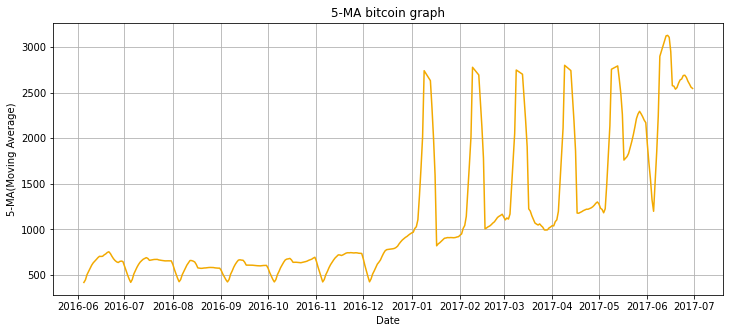

"\nplt.figure(figsize=(10,5))\nplt.plot(coin5, color='#f2a900')\nplt.title('5-MA bitcoin graph')\nplt.xlabel('Date')\nplt.ylabel('5-MA(Moving Average)')\n\nplt.grid(True)\nplt.show()\n"

In [48]:
#2. 그래프 그리기
import matplotlib.dates as md

fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot()
plt.plot(coin5, color='#f2a900')
plt.title('5-MA bitcoin graph')
plt.xlabel('Date')
plt.ylabel('5-MA(Moving Average)')
ax.xaxis.set_major_locator(md.MonthLocator())
plt.grid(True)
plt.show()
'''
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(coin5, color='#f2a900')
ax.xaxis.set_major_locator(md.MonthLocator())
plt.grid(True)
plt.show()
'''
'''
plt.figure(figsize=(10,5))
plt.plot(coin5, color='#f2a900')
plt.title('5-MA bitcoin graph')
plt.xlabel('Date')
plt.ylabel('5-MA(Moving Average)')

plt.grid(True)
plt.show()
'''

###Bonus Part

In [49]:
#이더리움 데이터 불러오기
eth=pd.read_csv("./ETH_day.csv", index_col='Date', parse_dates=True, usecols=["Date","Open"])
eth.sort_index(inplace=True)
eth

,Open
Date,
2016-05-09,12.00
2016-05-10,9.98
2016-05-11,9.68
2016-05-12,10.43
2016-05-13,10.20
...,...
2020-04-11,158.26
2020-04-12,158.66
2020-04-13,158.56


In [50]:
#1. 2016.6~2017.6 기간의 5-MA구하기
eth5=eth.loc['2016-06-01':'2017-06-30'].rolling(5).mean()
eth5

,Open
Date,
2016-06-01,NaN
2016-06-02,NaN
2016-06-03,NaN
2016-06-04,NaN
2016-06-05,13.982
...,...
2017-06-26,310.850
2017-06-27,296.592
2017-06-28,289.898


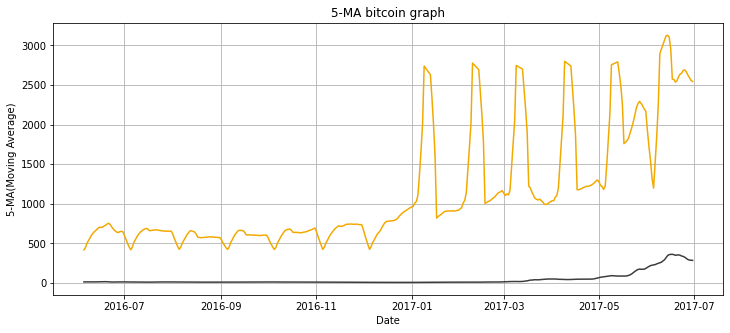

In [58]:
#2. 그래프 그리기
import matplotlib.dates as md
'''
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(coin5, color='#f2a900')
ax.xaxis.set_major_locator(md.MonthLocator())
plt.grid(True)
plt.show()
'''
'''
ax1=plt.subplots(figsize=(12,5))
ax1.plot(eth5, color='#3c3c3d')
ax1.xaxis.set_major_locator(md.MonthLocator())
plt.plot(ax,ax1)
plt.show()
'''
fig=plt.figure(figsize=(12,5))
plt.plot(coin5, color="#f2a900")
plt.plot(eth5, color="#3c3c3d")
plt.title('5-MA bitcoin graph')
plt.xlabel('Date')
plt.ylabel('5-MA(Moving Average)')
plt.grid(True)
plt.show()